# Exercises

## Part 1: Dataset inspection using Pandas and Seaborn

Understanding the data we are working with is extremely useful. This is especially relevant nowadays, as many powerful recent methods are data-driven.

We will use some well-known datasets to better appreciate the importance of data inspection.

1. Read [this dataset](https://gist.githubusercontent.com/ericbusboom/b2ac1d366c005cd2ed8c/raw/c92c66e43d144fa9c29dbd602d5af6988e8db533/anscombes.csv) using Pandas (there are multiple datasets in the data frame). Hint: you don't need to download the file beforehand
2. [Group](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) the data frame by dataset and print the `mean()` and `std()`. Are all the datasets the same? Hint: you can use the `columns` method of the data frame to figure out a good argument for the grouping method
3. Write a function that shows a scatter plot for each dataset in the data frame
4. Use the `describe()` method of the data frame class to compute more statistics. Are these most useful than the mean and the standard deviation?
5. Do the same with the datasets in `dozen_datasets.tsv`. Hint: use the kwarg `sep` of `pandas.read_csv` to read the [TSV file](https://en.wikipedia.org/wiki/Tab-separated_values#Conventions_for_lossless_conversion_to_TSV)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
#%config InlineBackend.figure_format='retina'  # useful for retina screens

In [2]:
url = 'https://gist.githubusercontent.com/ericbusboom/b2ac1d366c005cd2ed8c/raw/c92c66e43d144fa9c29dbd602d5af6988e8db533/anscombes.csv'
anscombes_df = pd.read_csv(url, index_col=0)
anscombes_df.columns

Index(['dataset', 'x', 'y'], dtype='object')

In [3]:
grouped = anscombes_df.groupby('dataset')

In [4]:
grouped.mean()

x         y
dataset               
I        9.0  7.500909
II       9.0  7.500909
III      9.0  7.500000
IV       9.0  7.500909

In [5]:
grouped.std()

x         y
dataset                    
I        3.316625  2.031568
II       3.316625  2.031657
III      3.316625  2.030424
IV       3.316625  2.030579

In [6]:
def plot_datasets_in_df(df):
    for dataset_name in df.dataset.unique():
        dataset = df[df.dataset == dataset_name]
        _, ax = plt.subplots()
        sns.scatterplot(x='x', y='y', data=dataset, ax=ax)
        ax.set_title(dataset_name)
        ax.axis('equal')

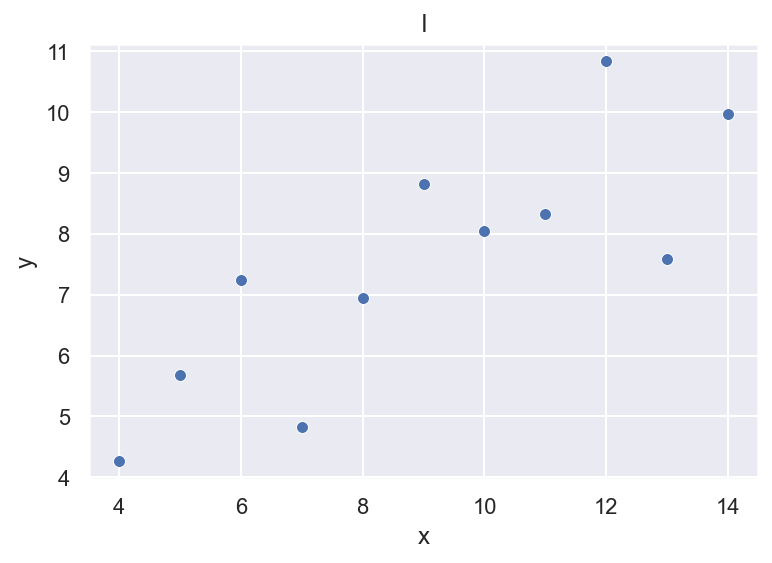

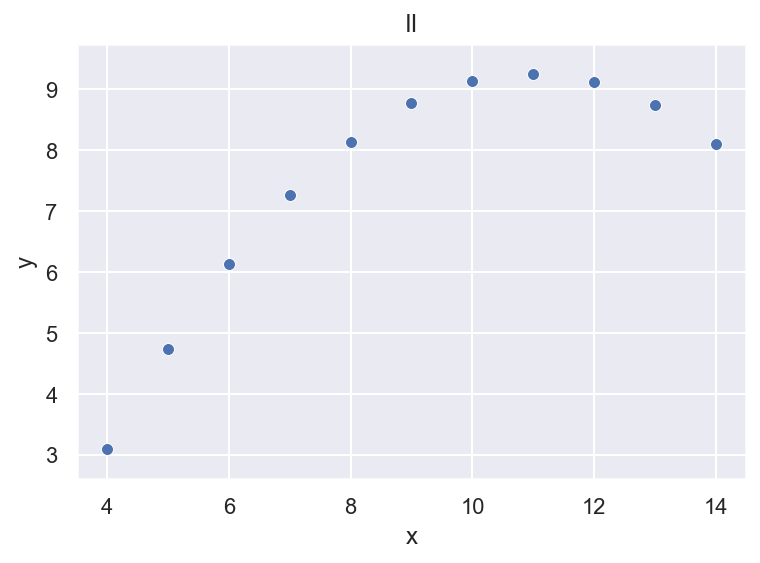

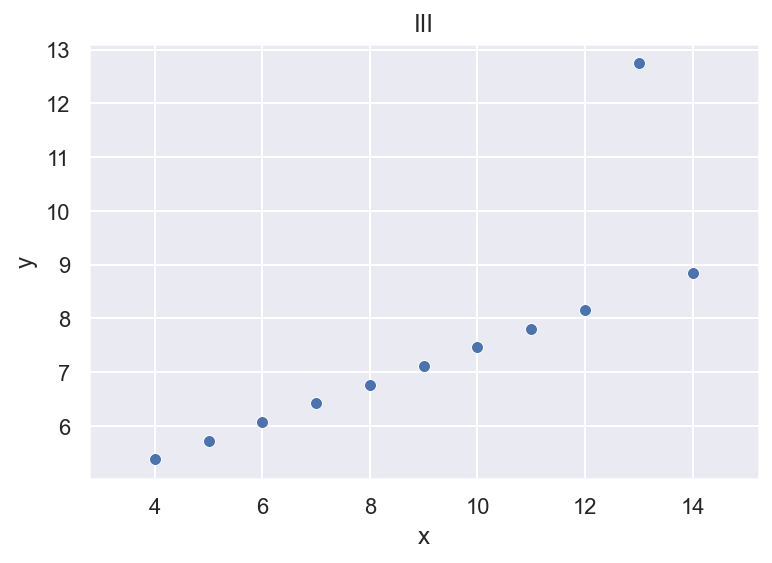

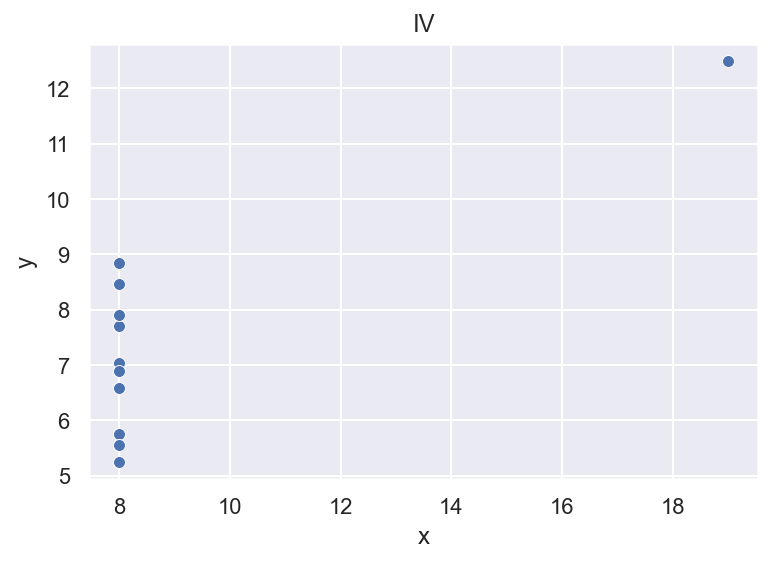

In [7]:
plot_datasets_in_df(anscombes_df)

In [8]:
grouped.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [9]:
dozen_df = pd.read_csv('dozen_datasets.tsv', sep='\t')

In [10]:
grouped = dozen_df.groupby('dataset')

In [11]:
grouped.mean()

x          y
dataset                         
away        54.266100  47.834721
bullseye    54.268730  47.830823
circle      54.267320  47.837717
dino        54.263273  47.832253
dots        54.260303  47.839829
h_lines     54.261442  47.830252
high_lines  54.268805  47.835450
slant_down  54.267849  47.835896
slant_up    54.265882  47.831496
star        54.267341  47.839545
v_lines     54.269927  47.836988
wide_lines  54.266916  47.831602
x_shape     54.260150  47.839717

In [12]:
grouped.std()

x          y
dataset                         
away        16.769825  26.939743
bullseye    16.769239  26.935727
circle      16.760013  26.930036
dino        16.765142  26.935403
dots        16.767735  26.930192
h_lines     16.765898  26.939876
high_lines  16.766704  26.939998
slant_down  16.766759  26.936105
slant_up    16.768853  26.938608
star        16.768959  26.930275
v_lines     16.769959  26.937684
wide_lines  16.770000  26.937902
x_shape     16.769958  26.930002

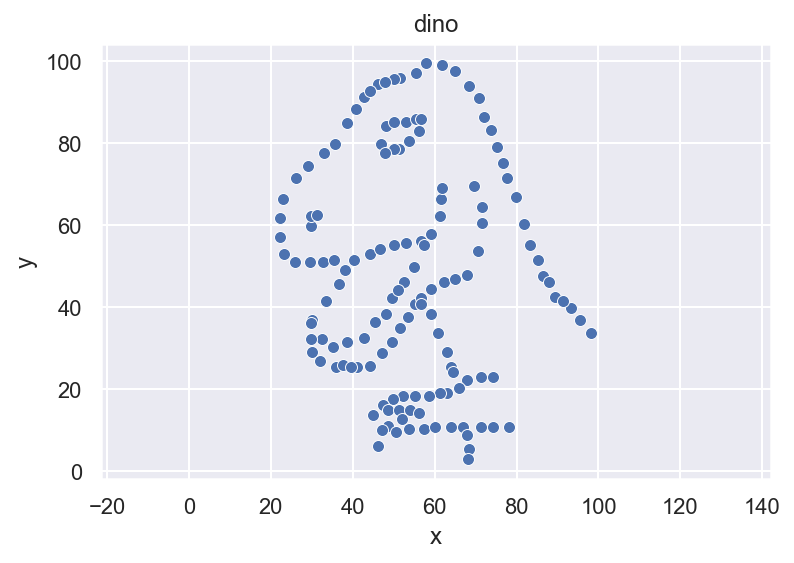

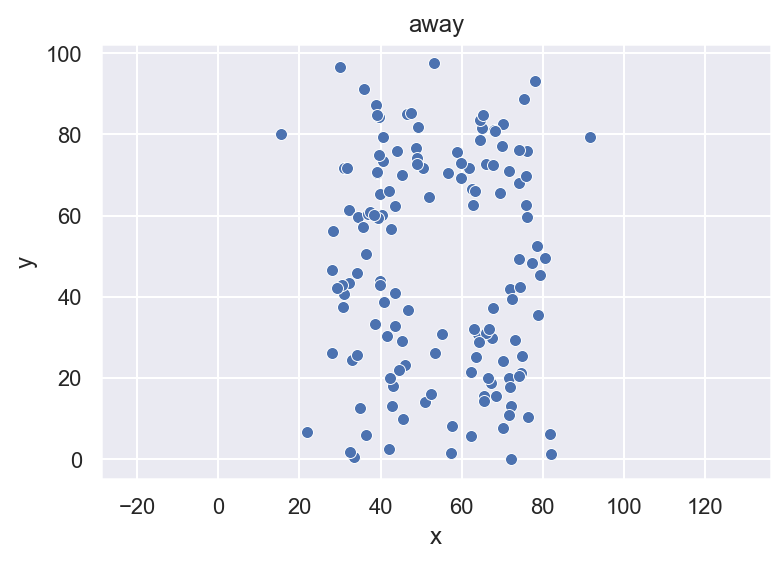

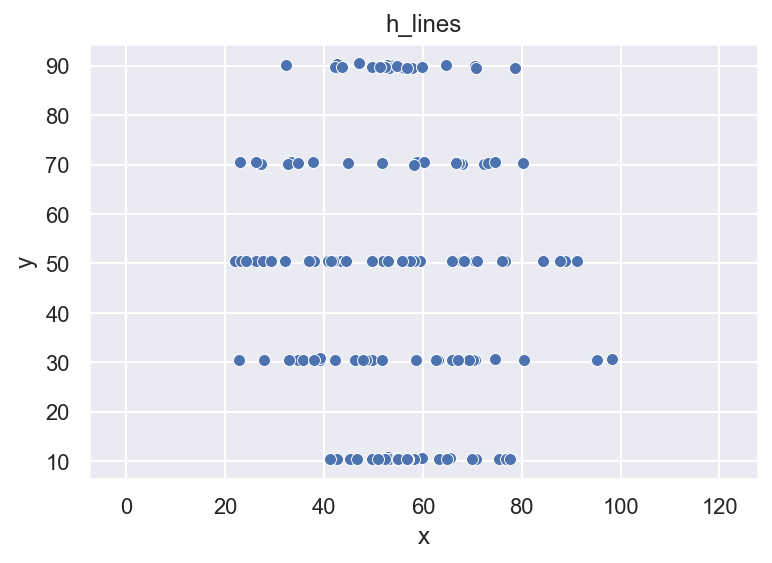

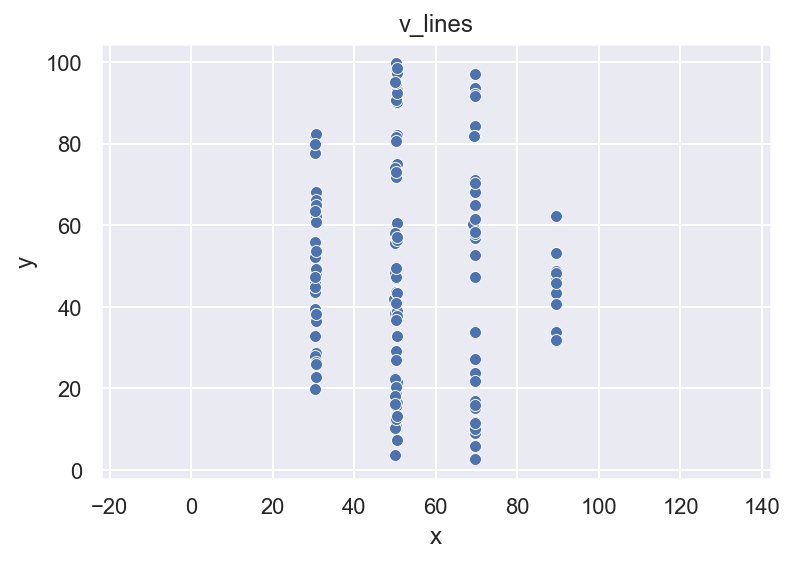

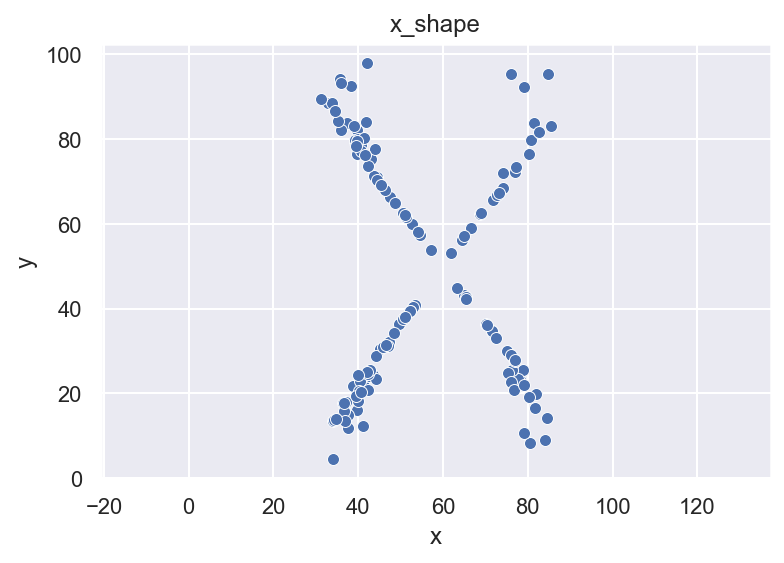

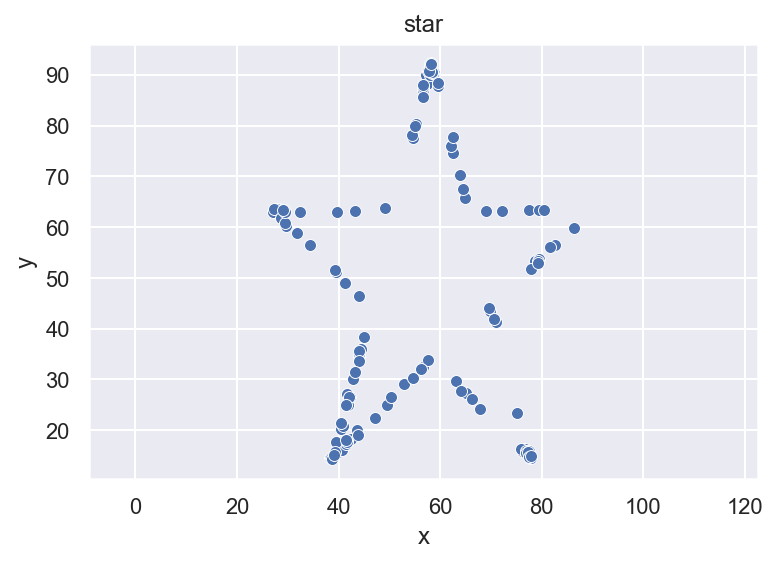

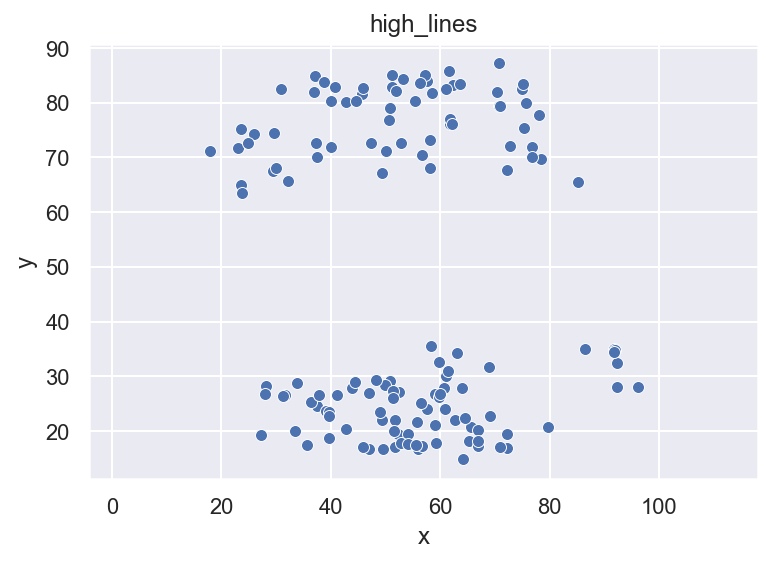

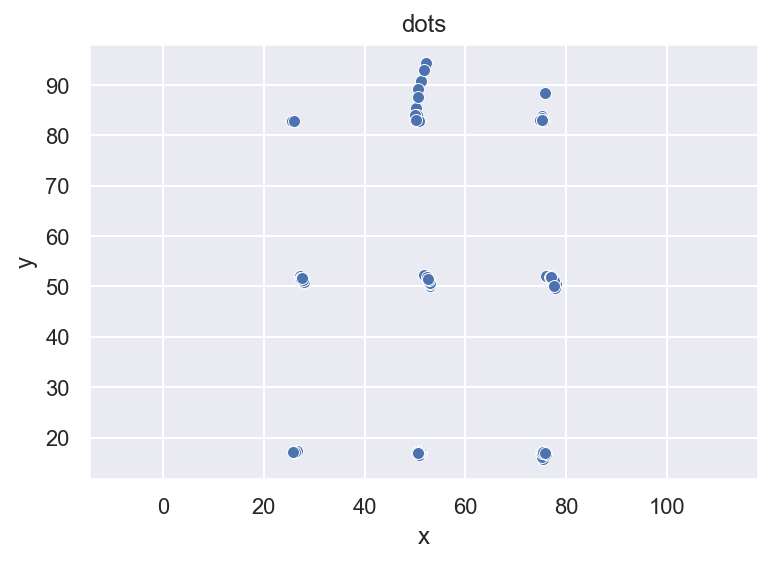

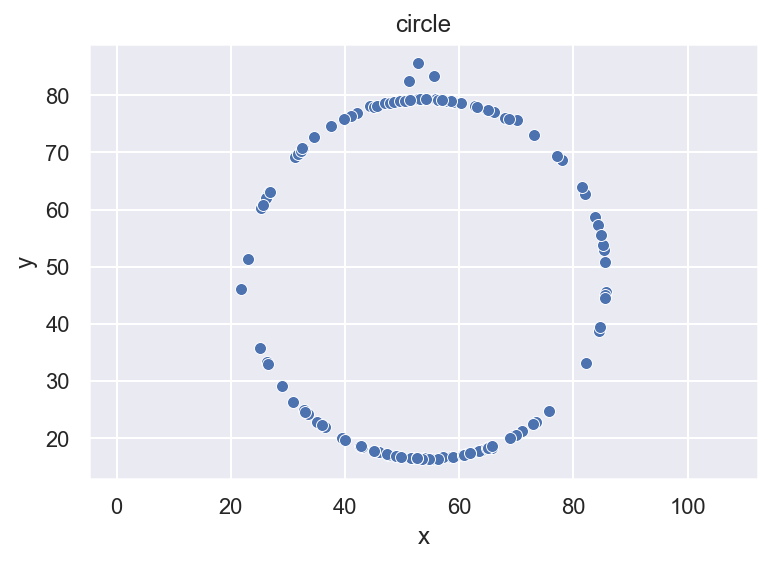

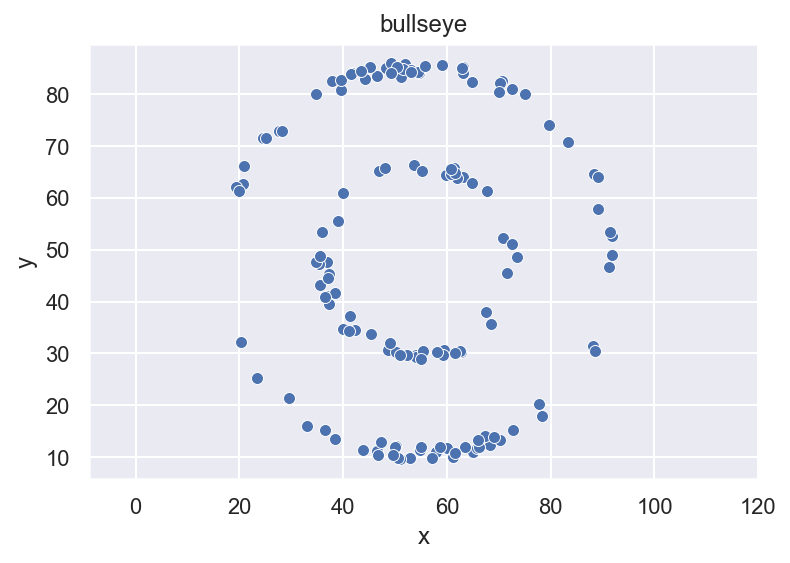

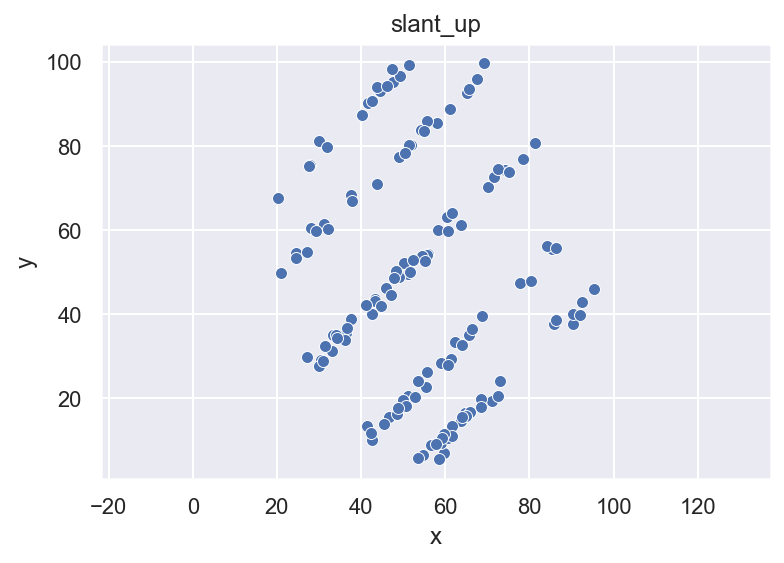

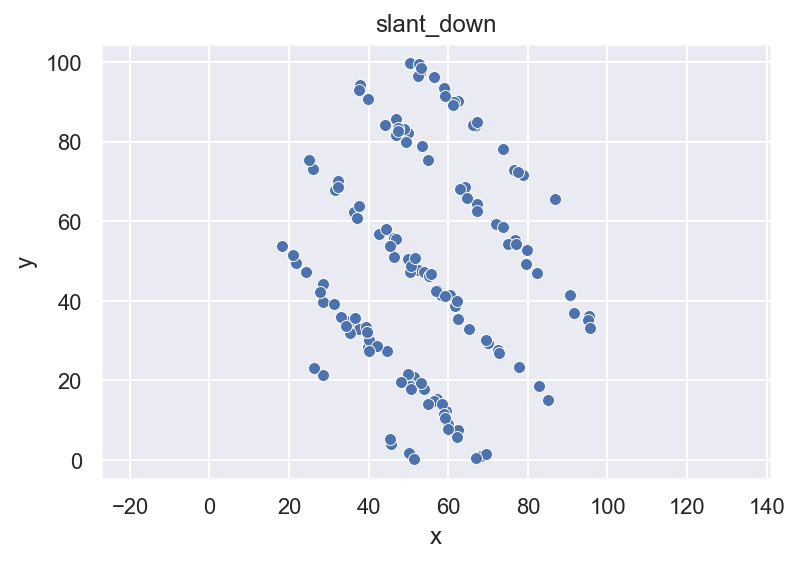

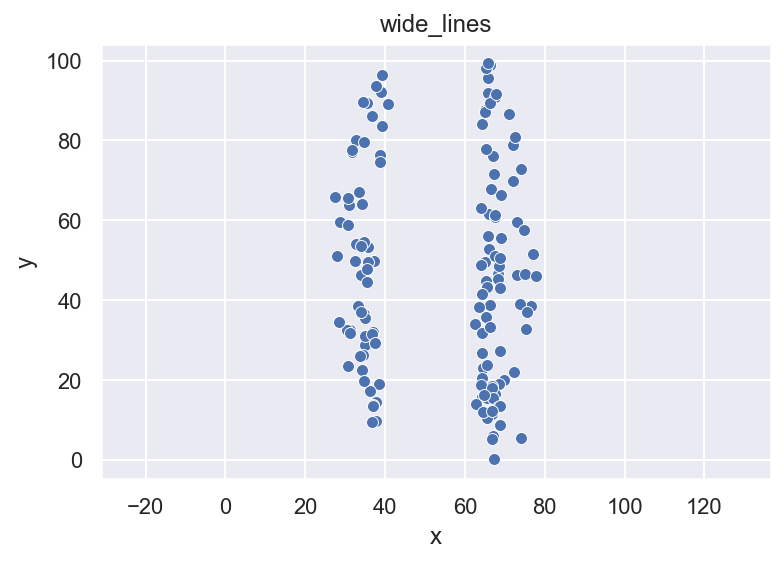

In [13]:
plot_datasets_in_df(dozen_df)

## Acknowledgements

- Data downloaded from [autodesk.com](https://www.autodesk.com/research/publications/same-stats-different-graphs)

## Part 2: Particle simulation using NumPy and Pillow

Simulation is very important when running experiments with real data is expensive. For example, we might want to simulate a car crash or a supernova. These experiments would be very expensive to actually recreate (especially the supernova).

We will simulate some particles moving and visualise the results using the libraries we know.

1. Create an long image using NumPy or Pillow (bonus: make it RGB)
2. Write a function that creates a copy of the image and draws a square in it using standard [indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html) (for NumPy) or [`ImageDraw`](https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html) (for Pillow)
3. Create an animation of the square moving in the image. You can use Pillow to [write a GIF from a list instances of `PIL.Image`](https://note.nkmk.me/en/python-pillow-gif/). Use your imagination!

In [14]:
%pip install --quiet tqdm  # very nice library to show progress bars

Note: you may need to restart the kernel to use updated packages.


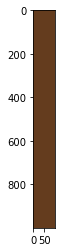

In [3]:
import numpy as np
from PIL import Image
from tqdm.notebook import trange  # outside Jupyter it would be just "from tqdm import trange"
sns.reset_orig()  # unset Seaborn settings

shape = height, width, _ = 1000, 100, 3
bg_color = 100, 60, 30
array = np.full(shape, bg_color, dtype=np.uint8)

def plot(array):
    _, ax = plt.subplots()
    plt.imshow(array)
    # ax.axis('off')  # removing the axes makes it nicer, but less clear
    
plot(array)

In [16]:
def draw_square(array, top, size, color, copy=True):
    """Draw a square in an image.
    
    Args:
        array: NumPy array on which the square will be drawn.
        top: Row at the top of the square.
        size: Size (side) of the square.
        color: Color used to fill the square.
        copy: If ``True``, the square will be drawn in a copy of the image.
    """
    if copy:  # exercise: what happens if copy is False?
        array = array.copy()
    half_size = size // 2
    i_ini = top
    i_fin = top + size
    j_mid = array.shape[1] // 2
    j_ini = j_mid - half_size
    j_fin = j_mid + half_size
    array[i_ini:i_fin, j_ini:j_fin] = color
    return array

The top of the square is row number 925


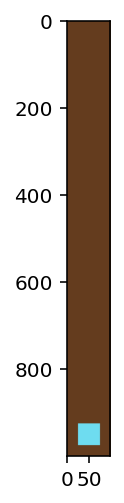

In [17]:
fg_color = 110, 220, 240
size = width // 2
margin = width // 4
top_index = height - size - margin
print('The top of the square is row number', top_index)
plot(draw_square(array, top_index, size, fg_color))

In [18]:
class Particle:
    """Particle (square) that will be moved because of gravity.
    
    Args:
        initial_top_index: Initial postion of the top of the square.
        gravity: Value of gravity that will affect the square.
        friction_factor: Factor between 0 and 1 that slows down the square.
    """
    def __init__(self, initial_top_index, gravity, friction_factor=0):
        self.top_index = initial_top_index
        self.gravity = gravity
        self.velocity = 0
        self.friction_factor = friction_factor
    
    def update(self):
        """Update velocity according to gravity and position according to velocity."""
        self.velocity += self.gravity
        self.velocity *= 1 - self.friction_factor
        self.top_index += self.velocity
        if self.top_index < 0:
            self.bounce()
    
    def bounce(self):
        """Change position and velocity to simulate bouncing."""
        self.top_index = 0
        self.velocity *= -1

In [19]:
# Set the desired animation parameters
fps = 30
num_seconds = 10
gravity = -2
horizontal = True  # so it fits on Jupyter
output_path = 'friction.gif'

In [20]:
# Run the simulation!
num_frames = num_seconds * fps
initial_top_index = top_index = height - size - margin
particle = Particle(top_index, gravity, friction_factor=0.02)
images = []
positions = []
for _ in trange(num_frames):
    top_index = round(particle.top_index)
    positions.append(top_index)
    array_with_square = draw_square(array, top_index, size, fg_color)
    array_with_square = np.flipud(array_with_square)  # so it looks nicer
    if horizontal:
        array_with_square = np.rot90(array_with_square, -1)
    image = Image.fromarray(array_with_square)
    images.append(image)
    particle.update()

  0%|          | 0/300 [00:00<?, ?it/s]

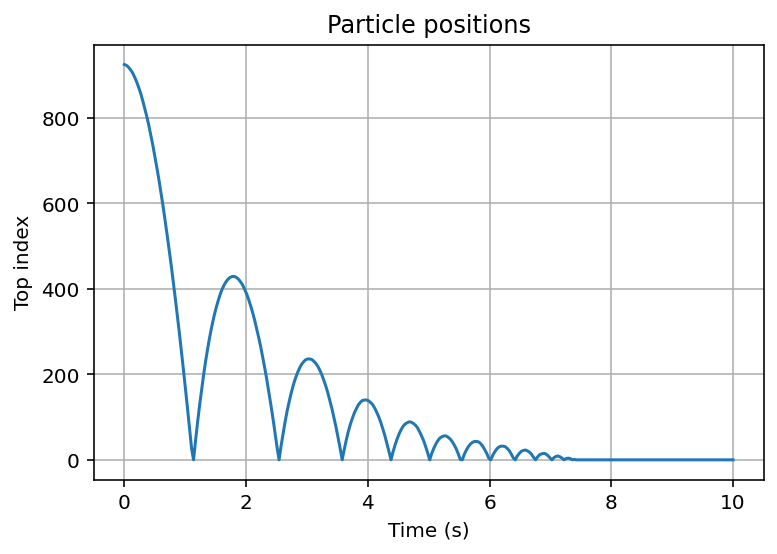

In [21]:
# Let's take a look at all the computed positions
time = np.linspace(0, num_seconds, num_frames)
_, ax = plt.subplots()
ax.plot(time, positions)
ax.grid()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Top index')
ax.set_title('Particle positions');

In [22]:
# Save the GIF
frame_duration_ms = 1 / fps * 1000
images[0].save(
    output_path,
    save_all=True,
    append_images=images[1:],
    duration=frame_duration_ms,
    loop=0,  # loop indefinitey
)

In [23]:
# Function to show the GIF in a cell
def display_gif(path):
    # Adapted from https://www.numfys.net/howto/animations/
    from IPython import display
    with open(path, 'rb') as file:
        display.display(display.Image(file.read()))

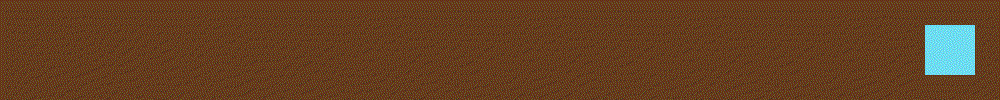

In [24]:
display_gif(output_path)

In [25]:
# Let's create a whole system that can simulate many particles at the same time! 🌌
# Just because we can 😎
# We'll use NumPy so the operation are vectorised 🚀
class System:
    def __init__(self, height, width, bg_color, num_particles, acceleration, friction_factor):
        shape = height, width, 3
        self.bg_array = np.full(shape, bg_color, dtype=np.uint8)
        self.num_particles = num_particles
        self.height = height
        self.width = width
        self.acceleration = acceleration
        self.friction_factor = friction_factor
        self.min_size = 5
        self.max_size = 20
        self.max_initial_velocity = 10
        self.positions, self.velocities, self.sizes, self.colors = self.create_particles()
    
    def create_particles(self):
        pos_rows = self.height * np.random.rand(self.num_particles, 1)
        pos_columns = self.width * np.random.rand(self.num_particles, 1)
        
        positions = np.hstack((pos_rows, pos_columns))
        velocities = np.random.randint(
            -self.max_initial_velocity,
            self.max_initial_velocity,
            size=(self.num_particles, 2),
        ).astype(float)
        sizes = np.random.randint(self.min_size, self.max_size, size=self.num_particles)
        colors = np.random.randint(50, 255, size=(self.num_particles, 3), dtype=np.uint8)
        return positions, velocities, sizes, colors
    
    def update(self):
        self.velocities[:, 0] += self.acceleration  # affect only in the vertical direction
        self.velocities *= 1 - self.friction_factor
        self.positions += self.velocities
        self.bounce()
    
    def bounce(self):
        mask = self.positions[:, 0] < 0
        self.positions[mask, 0] = 0
        self.velocities[mask, 0] *= -1
    
    def make_gif(self, num_seconds, output_path, frames_per_second=30):
        images = []
        num_frames = num_seconds * fps
        for _ in trange(num_frames):
            array = self.bg_array.copy()
            for i in range(self.num_particles):  # trange(self.num_particles, leave=False):
                row, col = self.positions[i].round().astype(int)
                size = self.sizes[i]
                color = self.colors[i]
                half_size = size // 2
                row_ini = row - half_size
                row_fin = row + half_size
                col_ini = col - half_size
                col_fin = col + half_size
                array[row_ini:row_fin, col_ini:col_fin] = color
            array = np.flipud(array)
            image = Image.fromarray(array)
            images.append(image)
            self.update()
            if np.all(self.positions[:, 0] == 0):
                print('Particles are not moving anymore. Interrupting...')
                break
        
        frame_duration_s = 1 / frames_per_second
        frame_duration_ms = frame_duration_s * 1000
        images[0].save(
            output_path,
            save_all=True,
            append_images=images[1:],
            duration=frame_duration_ms,
            loop=0,  # loop indefinitey
        )
        print('GIF saved to', output_path)

In [26]:
height = 512
width = 512
num_particles = 50
friction_factor = 0.02
bg_color = 3 * (50,)
system = System(height, width, bg_color, num_particles, gravity, friction_factor)
system_gif_path = 'system.gif'
system.make_gif(10, system_gif_path)

  0%|          | 0/300 [00:00<?, ?it/s]

Particles are not moving anymore. Interrupting...
GIF saved to system.gif


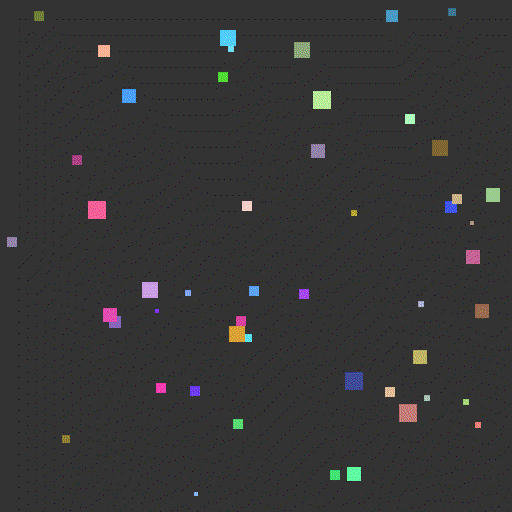

In [27]:
display_gif(system_gif_path)

Gravity is fun, and so is antigravity. Try importing it.

```python
import antigravity
```

Also, make sure you import this from time to time.

```python
import this
```